In [1]:
#Import important python libraries
import pandas as pd
import numpy as np
from scipy import stats
import os

#For visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from windrose import WindroseAxes
from matplotlib import cm

#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# **Summary Statisitcs and Missing Value Report**

In [2]:
#load data set and explore head 
df = pd.read_csv('C:/Users/nuhamin/Documents/kifiya/week 0/challenges/data/benin-malanville.csv')
print (df.head())

          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


In [3]:
#print dataframe shape
print(f'DataFrame shape is {df.shape}')
print 

#print data summary
print (df.info())

DataFrame shape is (525600, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 1

In [4]:
#drop 'Comments' column
df= df.drop('Comments', axis =1)

#print summary statistics
print (df.describe())

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.2000

In [5]:
#calculate % of missing values per column 
mis_values = df.isna().sum()
mis_vlaues_perc = (mis_values/len(df))*100

if mis_values.sum() ==0:
  print ('There are no columns with missing values')

else:
  #print total missing values per column
  print('Missing values per column:\n', mis_values)
  
  #list columns with <= 5% missing values
  col_null_low = mis_vlaues_perc[mis_vlaues_perc <= 5].index.tolist()
  if col_null_low:
    print('\nColumns with more than 5% missing values:', col_null_low)
  
  #list columns with >5% missing values
  col_null_high = mis_vlaues_perc[mis_vlaues_perc > 5].index.tolist()
  if col_null_high:
    print('\nColumns with more than 5% missing values:', col_null_high)

There are no columns with missing values


# **Outlier Detection & Basic Cleaning**

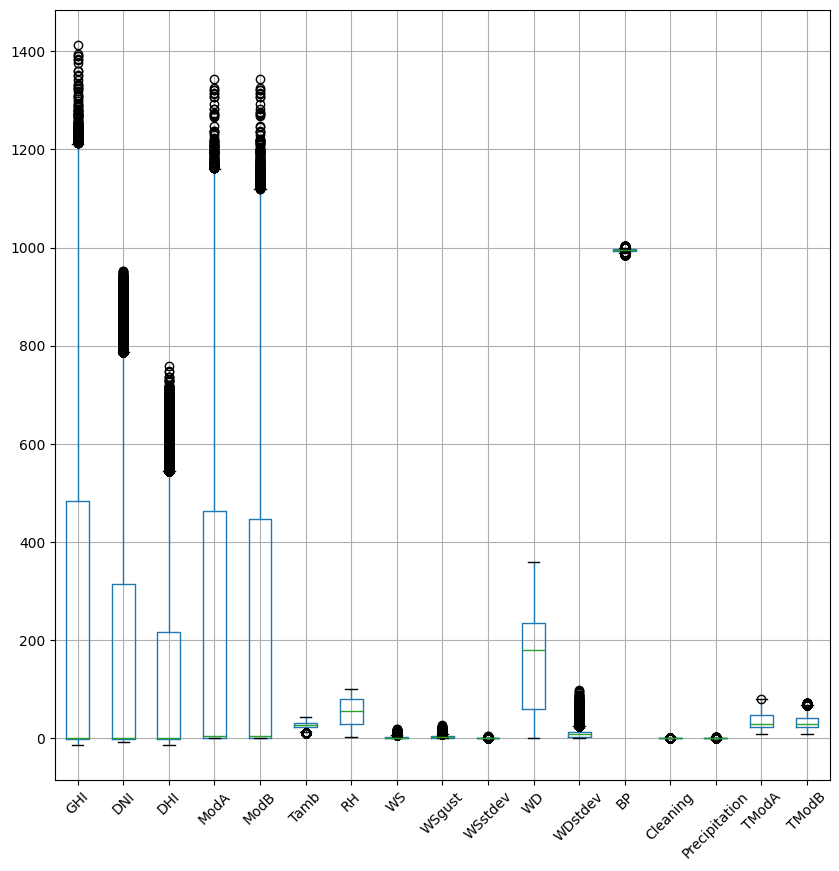

In [6]:
#plot box plot to visualise outliers

#adjust plot size
plt.figure(figsize=(10, 10)) 
#roate x-axis
df.boxplot(rot=45)
#show plot
plt.show()

In [7]:
#remove ouliers from key columns (GHI, DNI, DHI, ModA, ModB, WS, WSgust)
key_cols= ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

#calculate Z-score
z_scores = np.abs(stats.zscore(df[key_cols]))

#flag rows where Z-score >3 in any of the key columns
outlier_rows = df[(z_scores > 3).any(axis=1)]

#print flagged rows
print(f'Rows flagged as outliers (absolute Z-score > 3):', outlier_rows)

Rows flagged as outliers (absolute Z-score > 3):                Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
670     2021-08-09 11:11   836.0  235.0  610.6   778.8   783.8  30.3  68.2   
671     2021-08-09 11:12  1274.0  698.8  615.2  1210.3  1210.3  30.1  69.6   
672     2021-08-09 11:13   938.0  340.1  612.8   891.1   891.1  30.4  68.4   
673     2021-08-09 11:14   718.5  126.8  593.2   682.6   682.6  30.6  68.2   
674     2021-08-09 11:15  1349.0  771.8  618.0  1281.5  1281.5  30.9  67.1   
...                  ...     ...    ...    ...     ...     ...   ...   ...   
525141  2022-08-08 16:22     4.6   -0.1    4.6     6.1     5.9  21.9  99.0   
525142  2022-08-08 16:23     4.6    0.2    4.6     5.9     5.8  21.9  99.0   
525143  2022-08-08 16:24     4.5   -0.1    4.5     5.8     5.7  21.9  99.0   
525151  2022-08-08 16:32     4.7   -0.1    4.8     6.0     5.9  22.0  99.1   
525155  2022-08-08 16:36     4.8    0.0    4.9     6.0     5.9  22.0  99.1   

         WS  W

In [8]:
#handle outliers by dropping outlier rows
#index outlier rows
outlier_indices = outlier_rows.index

#drop outlier rows from dataframe
df_clean = df.drop(outlier_indices)

#dataFrame shape before adressing outliers 
print(f'DataFrame shape after adressing outliersis {df_clean.shape}')

DataFrame shape after adressing outliersis (517860, 18)


In [9]:
#export cleaned dataframe to data/country
#define the directory and filename for the cleaned data
output_dir = 'C:/Users/nuhamin/Documents/kifiya/week 0/Cross-Country-Solar-Farm-Analysis/data'
output_filename = 'Benin_clean.csv'
output_path = os.path.join(output_dir, output_filename)

#export the cleaned dataframe to csv file
#set index=False to avoid writing the dataframe index as a column in the CSV
df_clean.to_csv(output_path, index=False)


# **Time Series Analysis**

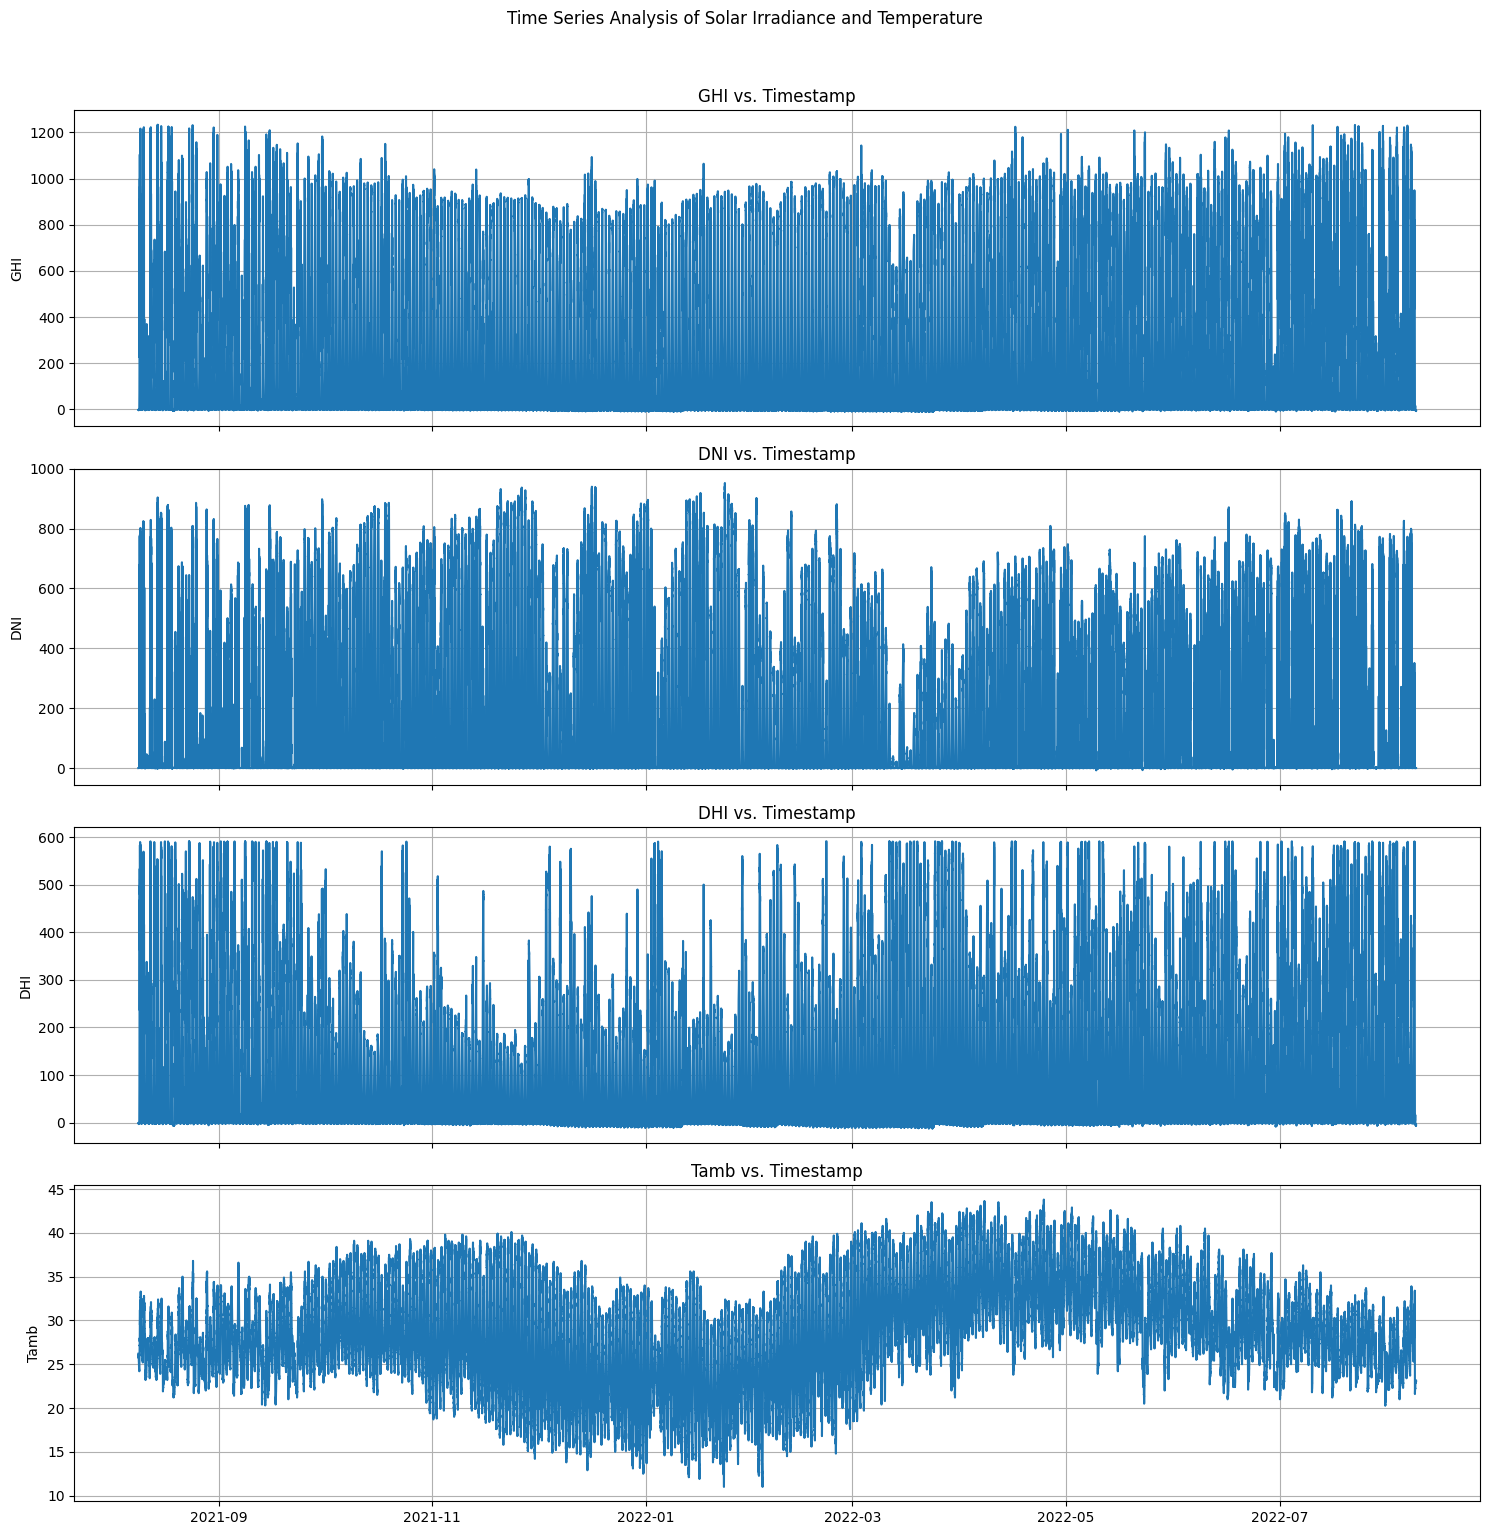

In [10]:
#convert 'Timestamp' to datetime
#use errors='coerce' to turn any parsing errors into NaT (Not a Time)
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'], errors='coerce')

#drop rows where timestamp could not be parsed
df_clean.dropna(subset=['Timestamp'], inplace=True)

#set the 'Timestamp' column as the DataFrame index
df_clean.set_index('Timestamp', inplace=True)

#plot time series data
#define the columns to plot
time_series_cols = ['GHI', 'DNI', 'DHI', 'Tamb']

#create a figure and a set of subplots
fig, axes = plt.subplots(len(time_series_cols), 1, figsize=(15, 15), sharex=True)

#plot each variable on a separate subplot
for i, col in enumerate(time_series_cols):
    axes[i].plot(df_clean.index, df_clean[col])
    axes[i].set_ylabel(col)
    axes[i].set_title(f'{col} vs. Timestamp')
    axes[i].grid(True)

#set a general title for the plots
fig.suptitle('Time Series Analysis of Solar Irradiance and Temperature', y=1.02)

#adjust layout and show plot
plt.tight_layout()
plt.show()

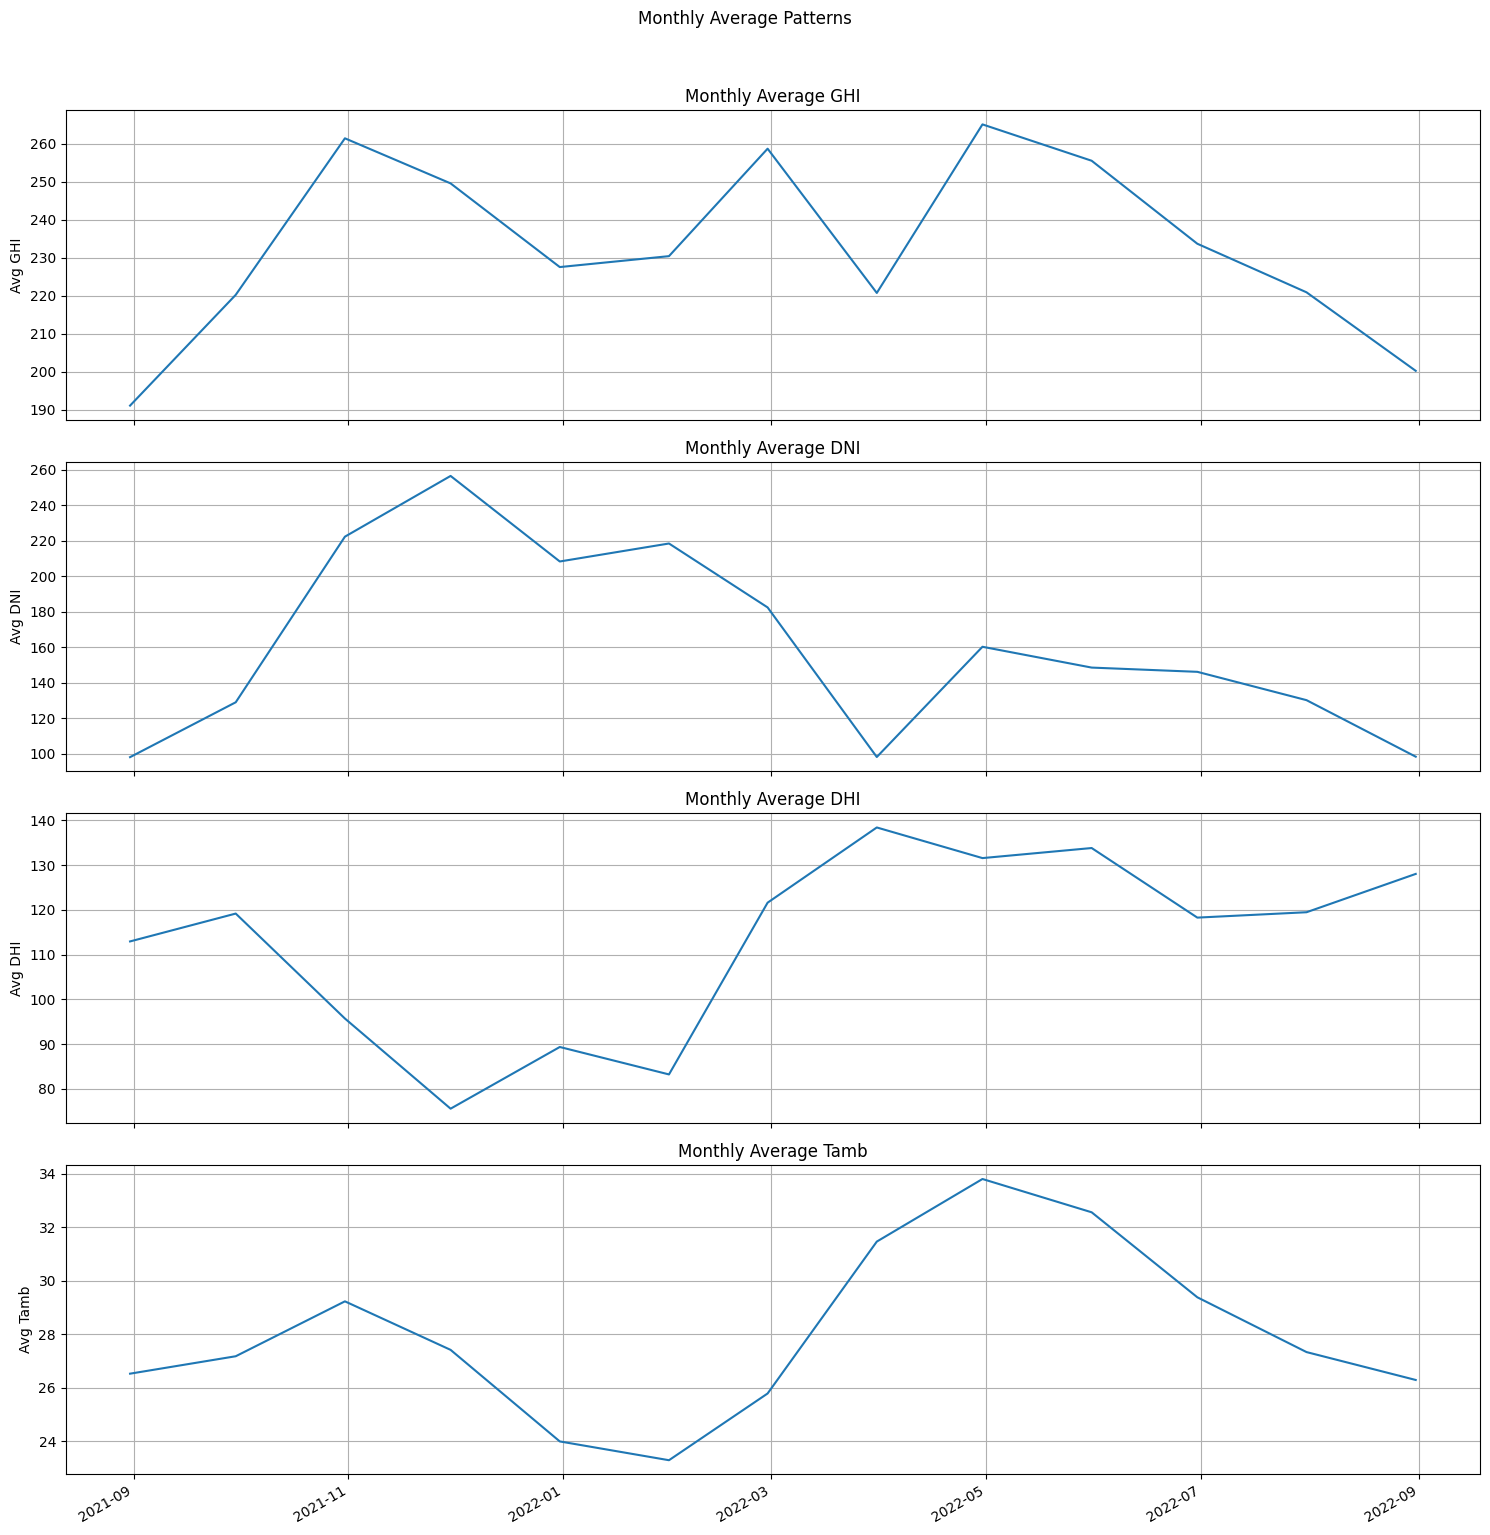

In [11]:
#observe patterns by month

#resample the data to monthly frequency, taking the mean
df_monthly = df_clean[time_series_cols].resample('M').mean()

#create a figure and a set of subplots for monthly data
fig_monthly, axes_monthly = plt.subplots(len(time_series_cols), 1, figsize=(15, 15), sharex=True)

#plot each variable's monthly average
for i, col in enumerate(time_series_cols):
    axes_monthly[i].plot(df_monthly.index, df_monthly[col])
    axes_monthly[i].set_ylabel(f'Avg {col}')
    axes_monthly[i].set_title(f'Monthly Average {col}')
    axes_monthly[i].grid(True)

#set a general title for the plots
fig_monthly.suptitle('Monthly Average Patterns', y=1.02)

#format x-axis for better date readability
plt.gcf().autofmt_xdate()

#adjust layout and show plot
plt.tight_layout()
plt.show()

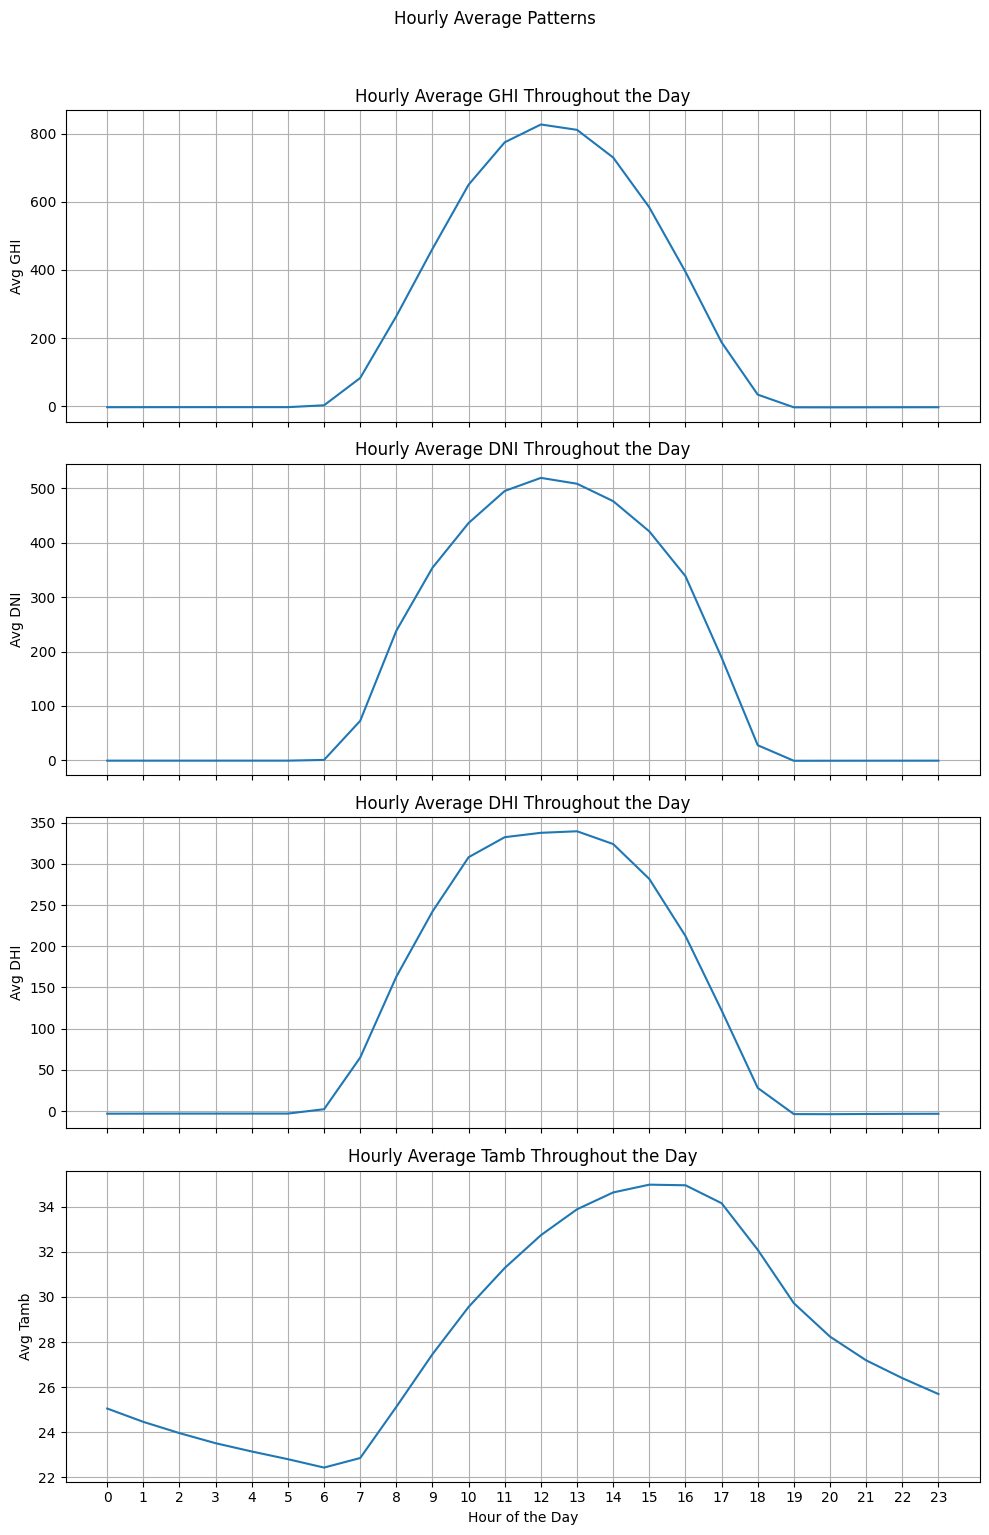

In [12]:
#observe trends throughout the day

#extract the hour from the Timestamp index
df_clean['Hour'] = df_clean.index.hour

#group by hour and calculate the mean for each variable
df_hourly = df_clean.groupby('Hour')[time_series_cols].mean()

#create a figure and a set of subplots for hourly data
fig_hourly, axes_hourly = plt.subplots(len(time_series_cols), 1, figsize=(10, 15), sharex=True)

#plot each variable's hourly average
for i, col in enumerate(time_series_cols):
    axes_hourly[i].plot(df_hourly.index, df_hourly[col])
    axes_hourly[i].set_ylabel(f'Avg {col}')
    axes_hourly[i].set_title(f'Hourly Average {col} Throughout the Day')
    axes_hourly[i].set_xticks(df_hourly.index) # Ensure all hours are shown
    axes_hourly[i].grid(True)

#set the common x-axis label
axes_hourly[-1].set_xlabel('Hour of the Day')

#set a general title for the plots
fig_hourly.suptitle('Hourly Average Patterns', y=1.02)

#adjust layout and show plot
plt.tight_layout()
plt.show()

# **Cleaning Impact**

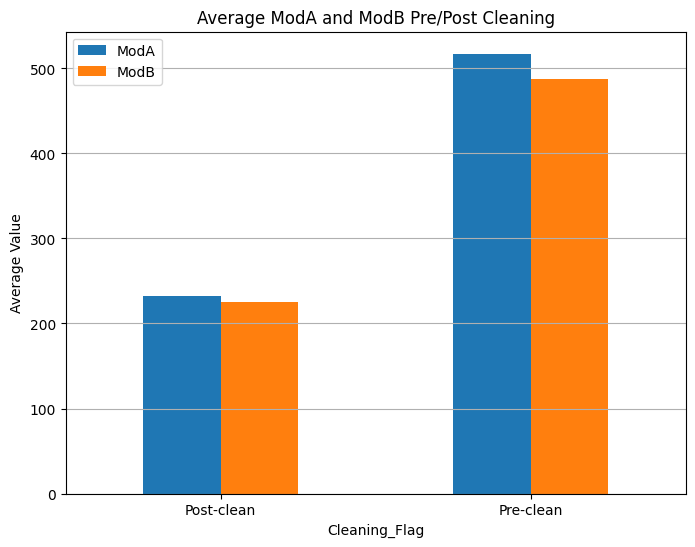

Average ModA and ModB Pre/Post Cleaning:
                     ModA        ModB
Cleaning_Flag                        
Post-clean     232.393310  225.026584
Pre-clean      517.343618  486.943256


In [13]:
#create a 'Cleaning_Flag' column in the original dataframe
df['Cleaning_Flag'] = 'Pre-clean'

#flag rows where Z-score >3 in any of the key columns in the original df
outlier_mask = (z_scores > 3).any(axis=1)

#set the flag to 'Post-clean' for the rows that are not outliers
df.loc[~outlier_mask, 'Cleaning_Flag'] = 'Post-clean'

#create and copy dataframe to work with if further
df_cleaned_flagged = df.copy() 

#group by 'Cleaning_Flag' and calculate the mean for 'ModA' and 'ModB' using the flagged df
mod_avg_by_cleaning = df_cleaned_flagged.groupby('Cleaning_Flag')[['ModA', 'ModB']].mean()

#plot the average ModA and ModB pre/post-clean
mod_avg_by_cleaning.plot(kind='bar', figsize=(8, 6))
plt.title('Average ModA and ModB Pre/Post Cleaning')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Print the average values
print("Average ModA and ModB Pre/Post Cleaning:")
print(mod_avg_by_cleaning)

# **Correlation & Relationship Analysis**

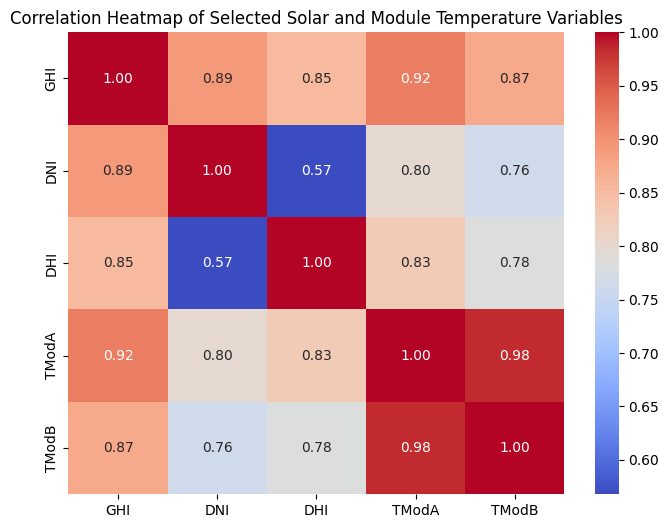

In [14]:
#heatmap of correlations (GHI, DNI, DHI, TModA, TModB)

#select relevant columns for correlation analysis
correlation_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']

#calculate the correlation matrix
correlation_matrix = df_clean[correlation_cols].corr()

#plot and show the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selected Solar and Module Temperature Variables')
plt.show()

Scatter plots: WS, WSgust, WD vs GHI


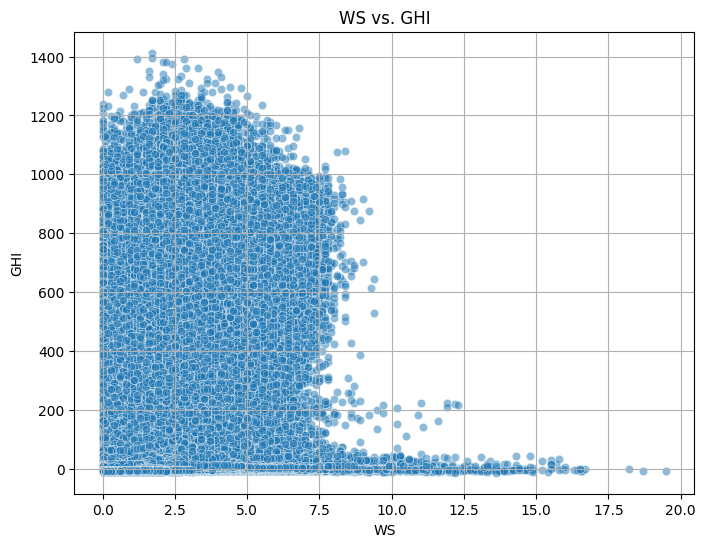

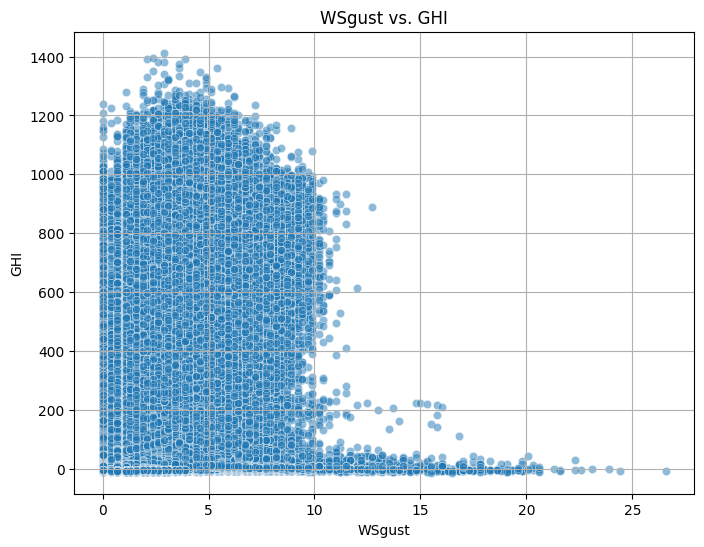

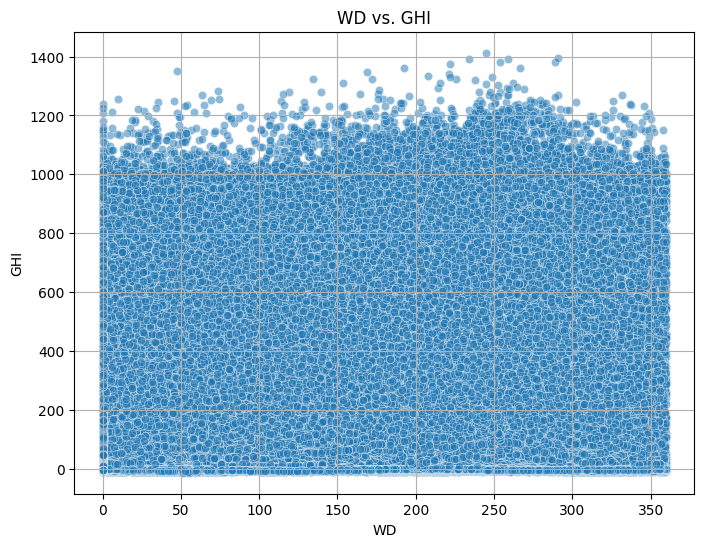

Scatter plots: RH vs Tamb and RH vs GHI


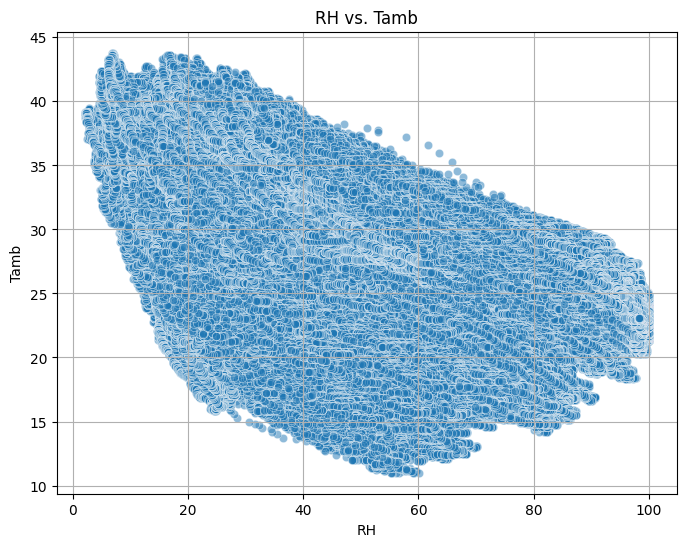

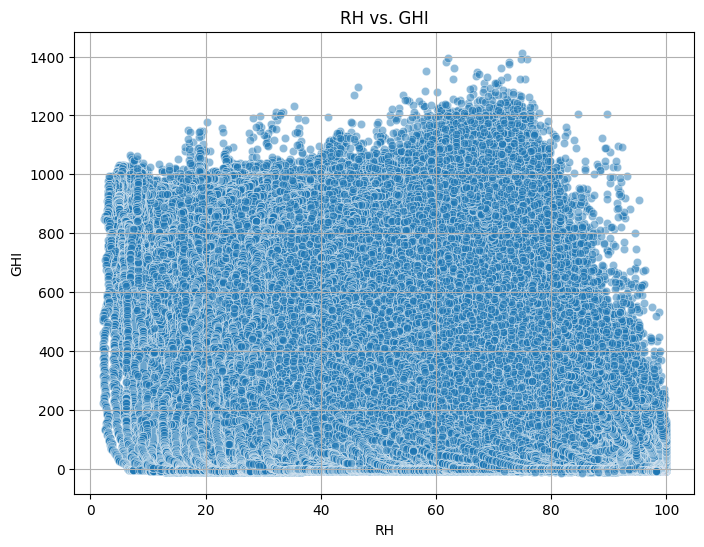

In [15]:
#Scatter plots: WS, WSgust, WD vs. GHI; RH vs. Tamb or RH vs. GHI.

#select columns for scatter plots
scatter_cols = ['WS', 'WSgust', 'WD']
target_col_ghi = 'GHI'
target_col_tamb = 'Tamb'
target_col_rh = 'RH'

#create scatter plots for Wind variables vs GHI
print(f"Scatter plots: {', '.join(scatter_cols)} vs {target_col_ghi}")
for col in scatter_cols:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_cleaned_flagged, x=col, y=target_col_ghi, alpha=0.5)
    plt.title(f'{col} vs. {target_col_ghi}')
    plt.xlabel(col)
    plt.ylabel(target_col_ghi)
    plt.grid(True)
    plt.show()

#create scatter plots for RH vs Tamb and RH vs GHI
print(f"Scatter plots: {target_col_rh} vs {target_col_tamb} and {target_col_rh} vs {target_col_ghi}")

#RH vs Tamb
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cleaned_flagged, x=target_col_rh, y=target_col_tamb, alpha=0.5)
plt.title(f'{target_col_rh} vs. {target_col_tamb}')
plt.xlabel(target_col_rh)
plt.ylabel(target_col_tamb)
plt.grid(True)
plt.show()

#RH vs GHI
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cleaned_flagged, x=target_col_rh, y=target_col_ghi, alpha=0.5)
plt.title(f'{target_col_rh} vs. {target_col_ghi}')
plt.xlabel(target_col_rh)
plt.ylabel(target_col_ghi)
plt.grid(True)
plt.show()

# **Wind & Distribution Analysis**

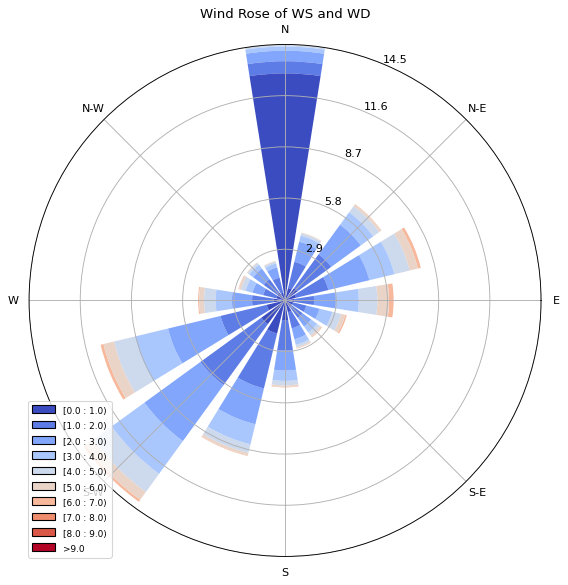

In [16]:
#plot wind rose or radial bar plot of WS/WD
#create a WindroseAxes instance
ax = WindroseAxes.from_ax()

#plot the wind rose
ax.bar(df_clean['WD'], df_clean['WS'], normed=True, cmap=cm.coolwarm, bins=np.arange(0, 10, 1))

#set the title
ax.set_title('Wind Rose of WS and WD')

#add a legend
ax.set_legend()

#show plot
plt.show()

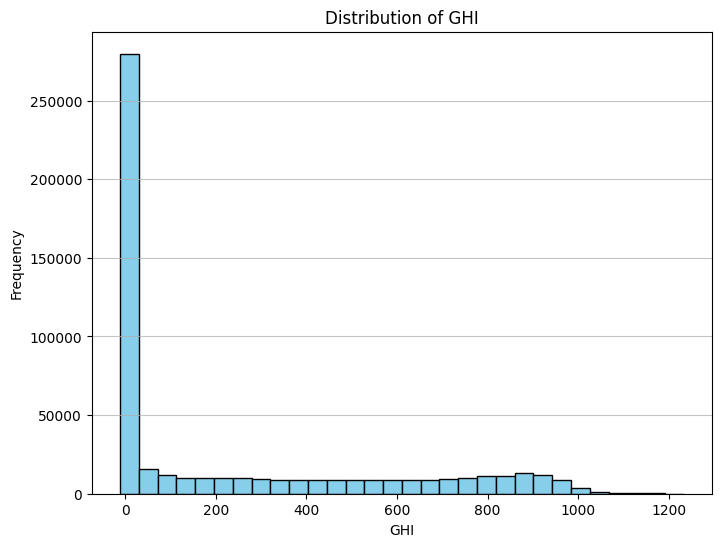

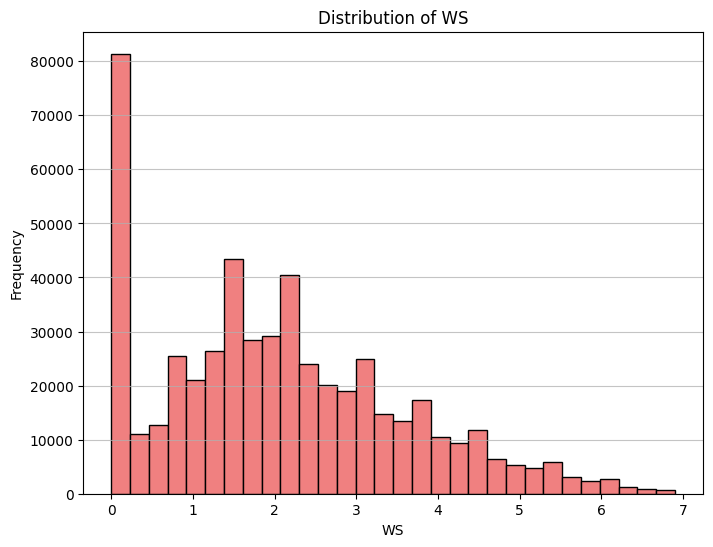

In [17]:
#create a histogram for GHI
plt.figure(figsize=(8, 6))
plt.hist(df_clean['GHI'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of GHI')
plt.xlabel('GHI')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

#create a histogram for WS
plt.figure(figsize=(8, 6))
plt.hist(df_clean['WS'].dropna(), bins=30, color='lightcoral', edgecolor='black')
plt.title('Distribution of WS')
plt.xlabel('WS')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# **Temperarure Analysis**

Scatter plots: RH vs Tamb and RH vs GHI


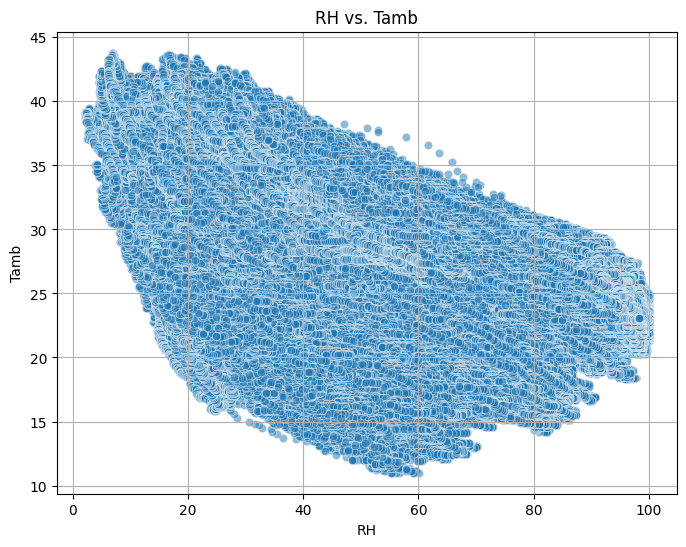

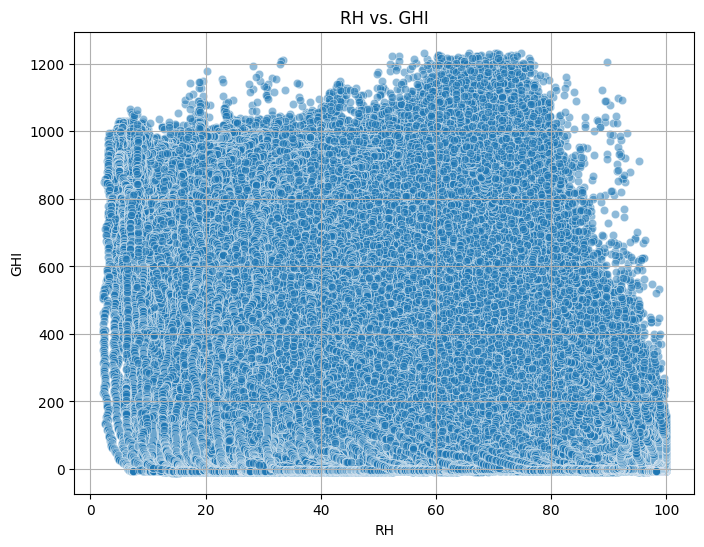

In [18]:
#Examine how relative humidity (RH) might influence temperature readings and solar radiation
#create scatter plots for RH vs Tamb and RH vs GHI
print(f"Scatter plots: {'RH'} vs {'Tamb'} and {'RH'} vs {'GHI'}")

#RH vs Tamb
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clean, x='RH', y='Tamb', alpha=0.5)
plt.title('RH vs. Tamb')
plt.xlabel('RH')
plt.ylabel('Tamb')
plt.grid(True)
plt.show()

#RH vs GHI
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clean, x='RH', y='GHI', alpha=0.5)
plt.title('RH vs. GHI')
plt.xlabel('RH')
plt.ylabel('GHI')
plt.grid(True)
plt.show()

# **Bubble Chart**

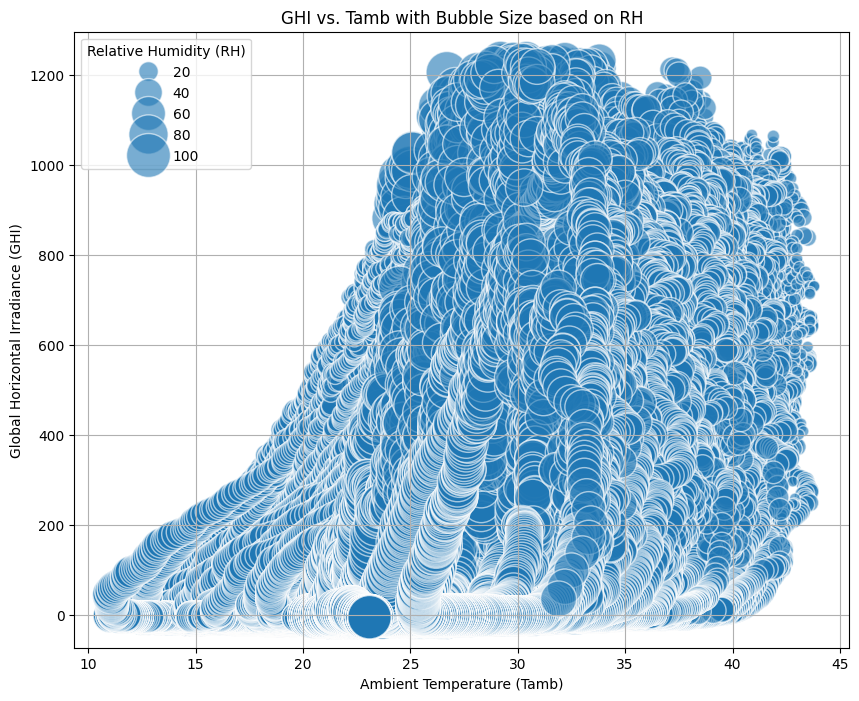

In [19]:
#Create GHI vs Tamb bubble plot with bubble size based on RH
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_clean, x='Tamb', y='GHI', size='RH', alpha=0.6, sizes=(20, 1000))
plt.title('GHI vs. Tamb with Bubble Size based on RH')
plt.xlabel('Ambient Temperature (Tamb)')
plt.ylabel('Global Horizontal Irradiance (GHI)')
plt.grid(True)
plt.legend(title='Relative Humidity (RH)')
plt.show()